In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

zip_path="/content/drive/MyDrive/dataset/dataset1/80-20-20250602T090545Z-1-001.zip"

with zipfile.ZipFile(zip_path,'r') as zip_ref:
 zip_ref.extractall("/content/drive/MyDrive/dataset80")

In [ ]:
!cp -r /content/drive/MyDrive/dataset80 /content/dataset80

In [ ]:
import os
os.listdir("/content/dataset80")

['80-20']

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
# Import necessary components from tensorflow.keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
# Import ImageDataGenerator from the correct location
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50V2, ResNet50
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import random

In [ ]:
# Set paths
train_path = '/content/dataset80/80-20/train'
test_path = '/content/dataset80/80-20/test'

# Classes
class_names = sorted(os.listdir(train_path))
num_classes = len(class_names)
print("Classes:", class_names)
print("Number of classes:", num_classes)

Classes: ['Dolphin', 'Fish', 'Jelly Fish', 'Octopus', 'Penguin', 'Sea Rays', 'Sea Urchins', 'Seahorse', 'Sharks', 'Starfish', 'Turtle_Tortoise', 'Whale', 'crab']
Number of classes: 13


In [ ]:

# Image generators
image_size = (250, 250)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=True
)

test_gen = test_datagen.flow_from_directory(
    test_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)


Found 4090 images belonging to 13 classes.
Found 1120 images belonging to 13 classes.


In [ ]:
# Build model
base_model = ResNet50V2(input_shape=(250,250,3), include_top=False, weights='imagenet')
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)         │ (None, 8, 8, 2048)     │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 13)             │         3,341 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,092,685 (91.91 MB)

 Trainable params: 527,885 (2.01 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

In [ ]:
# Callbacks
model_name = "/content/drive/MyDrive/resnet50V2_trained.h5"
callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ModelCheckpoint(model_name, save_best_only=True)
]

In [ ]:
# Train the model
history = model.fit(train_gen, epochs=10, callbacks=callbacks)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1023s 8s/step - accuracy: 0.6713 - loss: 1.0307
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/model_checkpoint.py:209: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 1008s 8s/step - accuracy: 0.8843 - loss: 0.3532
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1033s 8s/step - accuracy: 0.9083 - loss: 0.2638
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1002s 8s/step - accuracy: 0.9279 - loss: 0.2274
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1024s 8s/step - accuracy: 0.9423 - loss: 0.1713
Epoch 6/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1019s 8s/step - accuracy: 0.9558 - loss: 0.1371
Epoch 7/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1014s 8s/step - accuracy: 0.9550 - loss: 0.1289
Epoch 8/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1002s 8s/step - accuracy: 0.9564 - loss: 0.1303
Epoch 9/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1024s 8s/step - accuracy: 0.9620 - loss: 0.1112
Epoch 10/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1025s 8s/step - accuracy: 0.9717 - loss: 0.0916


In [ ]:
# Plot training graphs
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

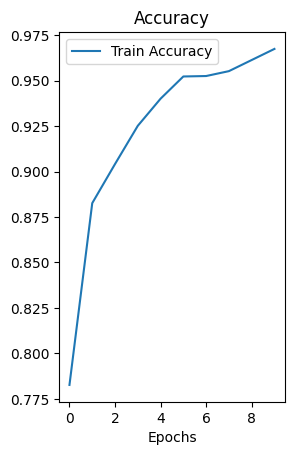

In [ ]:
# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()

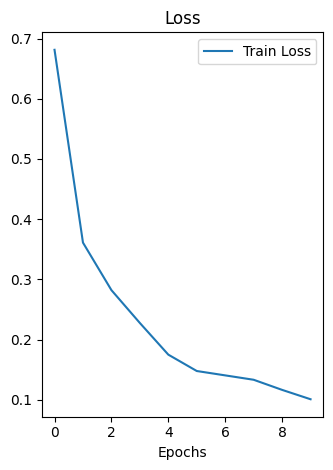

In [ ]:
# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.title("Loss")
plt.xlabel("Epochs")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import os
from PIL import Image, UnidentifiedImageError

test_path = '/content/dataset80/80-20/test'

def find_and_remove_invalid_images(directory):
    """
    Walks through a directory and removes files that PIL cannot identify as images.
    """
    invalid_files_count = 0
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                # Attempt to open the file with PIL
                with Image.open(file_path) as img:
                    # Optionally, you can perform other checks here if needed
                    pass
            except UnidentifiedImageError:
                print(f"Found invalid image or non-image file: {file_path}")
                try:
                    os.remove(file_path)
                    print(f"Removed: {file_path}")
                    invalid_files_count += 1
                except OSError as e:
                    print(f"Error removing file {file_path}: {e}")
            except Exception as e:
                print(f"An unexpected error occurred with file {file_path}: {e}")

    print(f"\nFinished checking directory: {directory}")
    print(f"Total invalid files found and attempted to remove: {invalid_files_count}")


print(f"Checking and cleaning test directory: {test_path}")
find_and_remove_invalid_images(test_path)

# After cleaning, re-create the test generator to ensure it only points to valid files
test_datagen = ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_directory(
    test_path,
    target_size=image_size, # Make sure image_size is defined (e.g., (250, 250))
    batch_size=batch_size, # Make sure batch_size is defined (e.g., 32)
    class_mode='sparse',
    shuffle=False # Keep shuffle=False for evaluation
)

# Now try to evaluate the model again
loss, accuracy = model.evaluate(test_gen)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Checking and cleaning test directory: /content/dataset80/80-20/test
Found invalid image or non-image file: /content/dataset80/80-20/test/Jelly Fish/JellyFish (212).jpg
Removed: /content/dataset80/80-20/test/Jelly Fish/JellyFish (212).jpg

Finished checking directory: /content/dataset80/80-20/test
Total invalid files found and attempted to remove: 1
Found 1119 images belonging to 13 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


35/35 ━━━━━━━━━━━━━━━━━━━━ 257s 7s/step - accuracy: 0.8228 - loss: 0.6638
Test Accuracy: 84.45%


In [ ]:
 # Save the entire model to an HDF5 file
model.save("/content/drive/MyDrive/resnet50V2_final80_20.h5")

print("Model saved successfully to /content/drive/MyDrive/resnet50V2_final.h5")

Model saved successfully to /content/drive/MyDrive/resnet50V2_final.h5


In [ ]:

from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("/content/drive/MyDrive/resnet50V2_final.h5")

print("Model loaded successfully.")




Model loaded successfully.


In [ ]:
# Unfreeze the base model
base_model = model.layers[0]  # ResNet50V2 is the first layer in your Sequential model
base_model.trainable = True

# Unfreeze top N layers (e.g., last 50 layers)
fine_tune_at = 140  # This value can be adjusted
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

print("Base model partially unfrozen for fine-tuning.")


Base model partially unfrozen for fine-tuning.


In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Lower learning rate for fine-tuning
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
fine_tune_history = model.fit(
    train_gen,
    validation_data=test_gen,
    epochs=10,
    callbacks=callbacks  # EarlyStopping and ModelCheckpoint
)


NameError: name 'train_gen' is not defined

In [ ]:
import numpy as np

# Make predictions
predictions = model.predict(test_gen)
predicted_classes = np.argmax(predictions, axis=1) # Get predicted class indices
true_classes = test_gen.classes # Get true class indices
class_labels = list(test_gen.class_indices.keys()) # Class names



35/35 ━━━━━━━━━━━━━━━━━━━━ 258s 7s/step


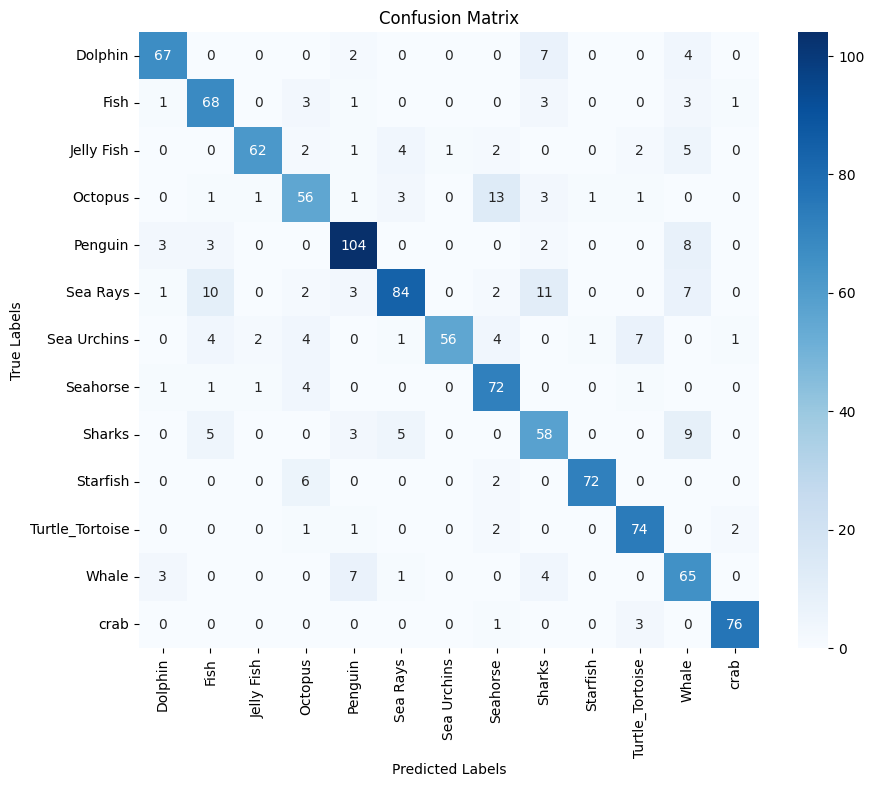

Classification Report:
                 precision    recall  f1-score   support

        Dolphin       0.88      0.84      0.86        80
           Fish       0.74      0.85      0.79        80
     Jelly Fish       0.94      0.78      0.86        79
        Octopus       0.72      0.70      0.71        80
        Penguin       0.85      0.87      0.86       120
       Sea Rays       0.86      0.70      0.77       120
    Sea Urchins       0.98      0.70      0.82        80
       Seahorse       0.73      0.90      0.81        80
         Sharks       0.66      0.72      0.69        80
       Starfish       0.97      0.90      0.94        80
Turtle_Tortoise       0.84      0.93      0.88        80
          Whale       0.64      0.81      0.72        80
           crab       0.95      0.95      0.95        80

       accuracy                           0.82      1119
      macro avg       0.83      0.82      0.82      1119
   weighted avg       0.83      0.82      0.82      1119



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


35/35 ━━━━━━━━━━━━━━━━━━━━ 249s 7s/step


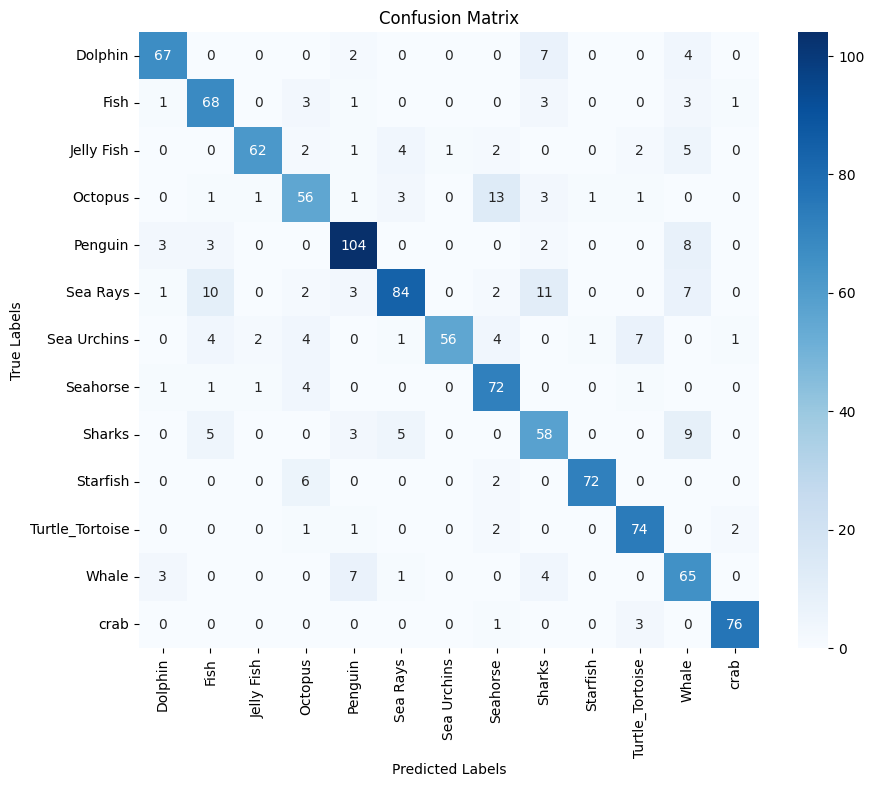

Classification Report:
                 precision    recall  f1-score   support

        Dolphin       0.88      0.84      0.86        80
           Fish       0.74      0.85      0.79        80
     Jelly Fish       0.94      0.78      0.86        79
        Octopus       0.72      0.70      0.71        80
        Penguin       0.85      0.87      0.86       120
       Sea Rays       0.86      0.70      0.77       120
    Sea Urchins       0.98      0.70      0.82        80
       Seahorse       0.73      0.90      0.81        80
         Sharks       0.66      0.72      0.69        80
       Starfish       0.97      0.90      0.94        80
Turtle_Tortoise       0.84      0.93      0.88        80
          Whale       0.64      0.81      0.72        80
           crab       0.95      0.95      0.95        80

       accuracy                           0.82      1119
      macro avg       0.83      0.82      0.82      1119
   weighted avg       0.83      0.82      0.82      1119


----

In [ ]:
# --- Model Evaluation & Metrics ---

# Predictions
predictions = model.predict(test_gen)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_gen.classes
class_labels = list(test_gen.class_indices.keys())

# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(true_classes, predicted_classes)

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Final Metrics
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average='weighted')
recall = recall_score(true_classes, predicted_classes, average='weighted')
f1 = f1_score(true_classes, predicted_classes, average='weighted')

# Output Summary
print("\n----- Final Evaluation Metrics -----")
print(f"✅ Accuracy      : {accuracy:.4f}")
print(f"✅ Precision     : {precision:.4f}")
print(f"✅ Recall        : {recall:.4f}")
print(f"✅ F1 Score      : {f1:.4f}")
print("\n✅ Confusion Matrix (Raw Values):")
print(cm)


✅ Model loaded successfully.
✅ Unfroze top 50 layers of the base model.
✅ Model recompiled for fine-tuning.
Found 4090 images belonging to 13 classes.
Found 4090 images belonging to 13 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.7986 - loss: 0.6853 

128/128 ━━━━━━━━━━━━━━━━━━━━ 1750s 13s/step - accuracy: 0.7989 - loss: 0.6841 - val_accuracy: 0.9479 - val_loss: 0.1834
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 619ms/step - accuracy: 0.9063 - loss: 0.2983

128/128 ━━━━━━━━━━━━━━━━━━━━ 102s 795ms/step - accuracy: 0.9064 - loss: 0.2981 - val_accuracy: 0.9641 - val_loss: 0.1225
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 643ms/step - accuracy: 0.9382 - loss: 0.2141

128/128 ━━━━━━━━━━━━━━━━━━━━ 105s 811ms/step - accuracy: 0.9382 - loss: 0.2141 - val_accuracy: 0.9741 - val_loss: 0.0930
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 604ms/step - accuracy: 0.9514 - loss: 0.1671

128/128 ━━━━━━━━━━━━━━━━━━━━ 137s 782ms/step - accuracy: 0.9514 - loss: 0.1671 - val_accuracy: 0.9807 - val_loss: 0.0691
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 642ms/step - accuracy: 0.9595 - loss: 0.1383

128/128 ━━━━━━━━━━━━━━━━━━━━ 109s 834ms/step - accuracy: 0.9595 - loss: 0.1384 - val_accuracy: 0.9851 - val_loss: 0.0528
Epoch 6/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 645ms/step - accuracy: 0.9615 - loss: 0.1314

128/128 ━━━━━━━━━━━━━━━━━━━━ 107s 833ms/step - accuracy: 0.9615 - loss: 0.1314 - val_accuracy: 0.9883 - val_loss: 0.0408
Epoch 7/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 603ms/step - accuracy: 0.9735 - loss: 0.1011

128/128 ━━━━━━━━━━━━━━━━━━━━ 139s 811ms/step - accuracy: 0.9735 - loss: 0.1011 - val_accuracy: 0.9927 - val_loss: 0.0310
Epoch 8/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 649ms/step - accuracy: 0.9693 - loss: 0.1035

128/128 ━━━━━━━━━━━━━━━━━━━━ 107s 835ms/step - accuracy: 0.9693 - loss: 0.1034 - val_accuracy: 0.9934 - val_loss: 0.0250
Epoch 9/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 645ms/step - accuracy: 0.9763 - loss: 0.0767

128/128 ━━━━━━━━━━━━━━━━━━━━ 104s 815ms/step - accuracy: 0.9764 - loss: 0.0766 - val_accuracy: 0.9956 - val_loss: 0.0222
Epoch 10/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 653ms/step - accuracy: 0.9787 - loss: 0.0804

128/128 ━━━━━━━━━━━━━━━━━━━━ 106s 827ms/step - accuracy: 0.9787 - loss: 0.0803 - val_accuracy: 0.9963 - val_loss: 0.0170
128/128 ━━━━━━━━━━━━━━━━━━━━ 23s 180ms/step - accuracy: 0.9957 - loss: 0.0204
✅ Test Accuracy After Fine-Tuning: 99.63%


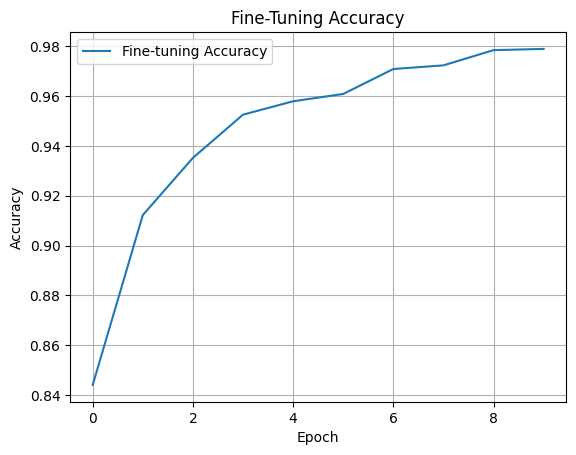

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# === Step 1: Load the saved model ===
model_path = "/content/drive/MyDrive/resnet50V2_final.h5"
model = load_model(model_path)
print("✅ Model loaded successfully.")

# === Step 2: Unfreeze some top layers of ResNet50V2 for fine-tuning ===
# Assumes model was built as Sequential with ResNet50V2 as first layer
base_model = model.layers[0]
base_model.trainable = True

# Unfreeze only the top N layers (rest remain frozen)
fine_tune_at = 140  # You can adjust this number
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

print(f"✅ Unfroze top {len(base_model.layers) - fine_tune_at} layers of the base model.")

# === Step 3: Recompile the model with a low learning rate ===
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
print("✅ Model recompiled for fine-tuning.")

# === Step 4: Rebuild Data Generators ===
train_path = '/content/drive/MyDrive/dataset80/80-20/train'
test_path = '/content/drive/MyDrive/dataset80/80-20/train'

image_size = (250, 250)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=True
)

test_gen = test_datagen.flow_from_directory(
    test_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

# === Step 5: Set up callbacks ===
fine_tuned_model_path = "/content/drive/MyDrive/resnet50V2_fine_tuned.h5"
callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ModelCheckpoint(fine_tuned_model_path, save_best_only=True)
]

# === Step 6: Train (Fine-tune) the model ===
fine_tune_history = model.fit(
    train_gen,
    validation_data=test_gen,
    epochs=10,
    callbacks=callbacks
)

# === Step 7: Evaluate the fine-tuned model ===
loss, accuracy = model.evaluate(test_gen)
print(f"✅ Test Accuracy After Fine-Tuning: {accuracy * 100:.2f}%")

# === Step 8: Plot Accuracy ===
plt.plot(fine_tune_history.history['accuracy'], label='Fine-tuning Accuracy')
plt.title("Fine-Tuning Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# === STEP 5: Evaluate and Save Final Model ===

final_model_path = "/content/drive/MyDrive/resnet_fineTune_final_80_20.h5"
model.save(final_model_path)
print("✅ Model saved successfully.")

✅ Model saved successfully.


In [10]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


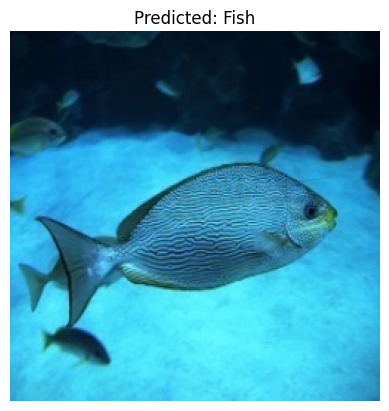

✅ Predicted class: Fish


'Fish'

In [11]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# === Step 1: Load the model ===
from tensorflow.keras.models import load_model
model = load_model("/content/drive/MyDrive/resnet_fineTune_final_80_20.h5")

# === Step 2: Define class names in correct order ===
# (Must match order of class folders in training directory)
class_names = sorted(os.listdir('/content/drive/MyDrive/dataset80/80-20/train'))  # or wherever your training data is

# === Step 3: Load and preprocess the image ===
def load_and_preprocess_image(img_path, target_size=(250, 250)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img, img_array

# === Step 4: Predict and show results ===
def predict_single_image(img_path):
    img, img_array = load_and_preprocess_image(img_path)

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    predicted_class_name = class_names[predicted_class_index]

    # Show image with prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class_name}")
    plt.show()

    print(f"✅ Predicted class: {predicted_class_name}")
    return predicted_class_name

# === Step 5: Run prediction on your image ===
# Example image path (change this to your actual image path)
img_path = "/content/drive/MyDrive/datasetiv380/80-20/test/Fish/14582681452_01aa023c8b_b.jpg"  # Replace with your own image path
predict_single_image(img_path)


128/128 ━━━━━━━━━━━━━━━━━━━━ 26s 179ms/step


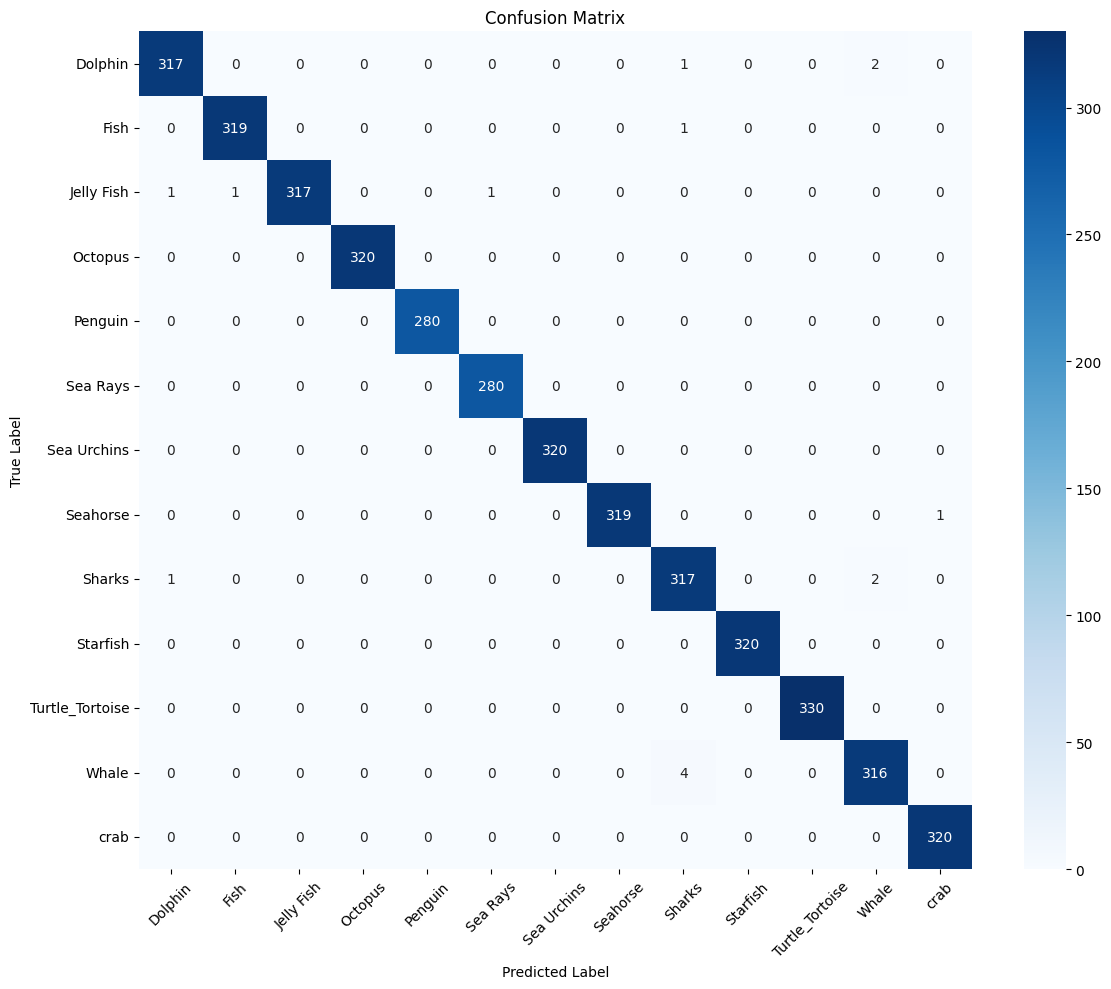

Classification Report:
                 precision    recall  f1-score   support

        Dolphin       0.99      0.99      0.99       320
           Fish       1.00      1.00      1.00       320
     Jelly Fish       1.00      0.99      1.00       320
        Octopus       1.00      1.00      1.00       320
        Penguin       1.00      1.00      1.00       280
       Sea Rays       1.00      1.00      1.00       280
    Sea Urchins       1.00      1.00      1.00       320
       Seahorse       1.00      1.00      1.00       320
         Sharks       0.98      0.99      0.99       320
       Starfish       1.00      1.00      1.00       320
Turtle_Tortoise       1.00      1.00      1.00       330
          Whale       0.99      0.99      0.99       320
           crab       1.00      1.00      1.00       320

       accuracy                           1.00      4090
      macro avg       1.00      1.00      1.00      4090
   weighted avg       1.00      1.00      1.00      4090



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# === Step 1: Predict on test data ===
y_pred_probs = model.predict(test_gen)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_gen.classes

# === Step 2: Confusion Matrix ===
cm = confusion_matrix(y_true, y_pred)
class_names = list(test_gen.class_indices.keys())

# === Step 3: Plot Confusion Matrix ===
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# === Step 4: (Optional) Classification Report ===
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))
